In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data = pd.read_csv('headbrain.csv')
data.head()


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [67]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values
print(data.shape)
print(x.shape)
print(y.shape)

(237, 4)
(237,)
(237,)


m = sum((x - mean(x))*(y-mean(y))/sum(x-mean(x))


after calculating m we can find c by placing values of mean(y), mean(x) and m in the equation


y = mx + c

In [68]:
mean_x = np.mean(x)
mean_y = np.mean(y)

n = len(x)

# calculating the values of m and c in formula y = mx + c
numer = 0
denom = 0
for i in range(n):
    numer+= (x[i]-mean_x)*(y[i]-mean_y)
    denom+= (x[i]-mean_x)**2
m = numer/denom
c = mean_y - (m*mean_x)
print(m,c)

0.26342933948939945 325.57342104944223


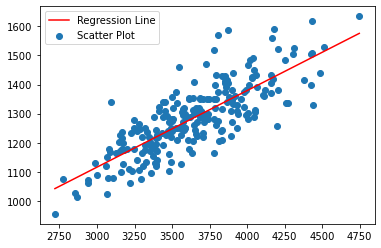

In [69]:
max_x = np.max(x) 
min_x = np.min(x) 

X = np.linspace(min_x,max_x,1000)
Y = m*X + c # Y is the predicted output 

plt.plot(X,Y,color='red',label='Regression Line')
plt.scatter(x,y,label='Scatter Plot')
plt.legend()
plt.show()

R^2 method to check the accuracy

Y is the predicted output
y is the actual output

R^2 = [sum(Y - mean(y))^2 / sum(Y - mean(y))^2]  

In [70]:
pred = 0
act = 0
for i in range(n):
    Y_pred = m*x[i] + c
    act += (y[i] - mean_y)**2
    pred += (mean_y - Y_pred)**2
r2 = (pred/act)
print(r2)

0.6393117199570001


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [72]:
x = x.reshape((n,1))
reg = LinearRegression()
reg = reg.fit(x,y)
Y = reg.predict(x)
print(reg.score(x,y))

0.639311719957


## Multivariate Linear Regression

In [266]:
train_dataset = pd.read_csv('train.csv')

In [267]:
train_set_x_orig = train_dataset.iloc[:,:-1]

In [268]:
train_set_x_orig

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [269]:
train_set_y_orig = train_dataset.iloc[:,-1:]

In [270]:
train_set_y_orig

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [271]:
test_dataset = pd.read_csv('test.csv')

In [272]:
test_set_x_orig = test_dataset.iloc[:,:]
test_set_x_orig

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [273]:
train_set_x = train_set_x_orig.loc[:,['MSZoning','MSSubClass','LotFrontage','LotArea','YrSold']].values

In [274]:
train_set_x

array([['RL', 60, 65.0, 8450, 2008],
       ['RL', 20, 80.0, 9600, 2007],
       ['RL', 60, 68.0, 11250, 2008],
       ...,
       ['RL', 70, 66.0, 9042, 2010],
       ['RL', 20, 68.0, 9717, 2010],
       ['RL', 20, 75.0, 9937, 2008]], dtype=object)

Filling NA values in LotFrontage column

In [275]:
imp = SimpleImputer(missing_values=np.nan,strategy = 'mean')

In [276]:
train_set_x[:,2:3] = imp.fit_transform(train_set_x[:,2:3])
train_set_x

array([['RL', 60, 65.0, 8450, 2008],
       ['RL', 20, 80.0, 9600, 2007],
       ['RL', 60, 68.0, 11250, 2008],
       ...,
       ['RL', 70, 66.0, 9042, 2010],
       ['RL', 20, 68.0, 9717, 2010],
       ['RL', 20, 75.0, 9937, 2008]], dtype=object)

In [277]:
from sklearn.preprocessing import LabelEncoder

In [279]:
LabEnc = LabelEncoder()
train_set_x[:,0] = LabEnc.fit_transform(train_set_x[:,0]) #as we need to labialize the 1st column 
train_set_x
print(np.unique(train_set_x[:,0]))
train_set_x.shape

[0 1 2 3 4]


(1460, 5)

In [280]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [281]:
transform = ColumnTransformer([('norm1',OneHotEncoder(),[0])], remainder = 'passthrough')

In [284]:
X= transform.fit_transform(train_set_x)
print(X.shape)
np.set_printoptions(threshold=np.inf)
X


(1460, 9)


array([[0.0, 0.0, 0.0, 1.0, 0.0, 60, 65.0, 8450, 2008],
       [0.0, 0.0, 0.0, 1.0, 0.0, 20, 80.0, 9600, 2007],
       [0.0, 0.0, 0.0, 1.0, 0.0, 60, 68.0, 11250, 2008],
       [0.0, 0.0, 0.0, 1.0, 0.0, 70, 60.0, 9550, 2006],
       [0.0, 0.0, 0.0, 1.0, 0.0, 60, 84.0, 14260, 2008],
       [0.0, 0.0, 0.0, 1.0, 0.0, 50, 85.0, 14115, 2009],
       [0.0, 0.0, 0.0, 1.0, 0.0, 20, 75.0, 10084, 2007],
       [0.0, 0.0, 0.0, 1.0, 0.0, 60, 70.04995836802665, 10382, 2009],
       [0.0, 0.0, 0.0, 0.0, 1.0, 50, 51.0, 6120, 2008],
       [0.0, 0.0, 0.0, 1.0, 0.0, 190, 50.0, 7420, 2008],
       [0.0, 0.0, 0.0, 1.0, 0.0, 20, 70.0, 11200, 2008],
       [0.0, 0.0, 0.0, 1.0, 0.0, 60, 85.0, 11924, 2006],
       [0.0, 0.0, 0.0, 1.0, 0.0, 20, 70.04995836802665, 12968, 2008],
       [0.0, 0.0, 0.0, 1.0, 0.0, 20, 91.0, 10652, 2007],
       [0.0, 0.0, 0.0, 1.0, 0.0, 20, 70.04995836802665, 10920, 2008],
       [0.0, 0.0, 0.0, 0.0, 1.0, 45, 51.0, 6120, 2007],
       [0.0, 0.0, 0.0, 1.0, 0.0, 20, 70.04995836802665

In [285]:
St = StandardScaler()

In [286]:
train_set_x[:,5:8] = St.fit_transform(train_set_x[:,5:8])

ValueError: Found array with 0 feature(s) (shape=(1460, 0)) while a minimum of 1 is required by StandardScaler.

In [154]:
train_set_x

array([[ 0.07337496, -0.22937175, -0.20714171,  0.13877749],
       [-0.87256276,  0.4519361 , -0.09188637, -0.61443862],
       [ 0.07337496, -0.09311018,  0.07347998,  0.13877749],
       ...,
       [ 0.30985939, -0.18395123, -0.14781027,  1.64520971],
       [-0.87256276, -0.09311018, -0.08016039,  1.64520971],
       [-0.87256276,  0.22483348, -0.05811155,  0.13877749]])

In [155]:
train_set_y = train_set_y_orig.values

In [156]:
train_set_y

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]], dtype=int64)

In [157]:
train_set_x.shape

(1460, 4)

In [158]:
train_set_y.shape

(1460, 1)

In [159]:
test_set_x = test_set_x_orig.loc[:,['MSSubClass','LotFrontage','LotArea','YrSold']].values

In [160]:
test_set_x

array([[   20.,    80., 11622.,  2010.],
       [   20.,    81., 14267.,  2010.],
       [   60.,    74., 13830.,  2010.],
       ...,
       [   20.,   160., 20000.,  2006.],
       [   85.,    62., 10441.,  2006.],
       [   60.,    74.,  9627.,  2006.]])

In [168]:
test_set_x[:,1:2] = imp.fit_transform(test_set_x[:,1:2])

In [169]:
m_train = train_set_x.shape[0]
m_test = test_set_x.shape[0]
print(m_train)
print(m_test)

1460
1459


In [170]:
w = np.zeros((4,1))
b = 0
print(w)

[[0.]
 [0.]
 [0.]
 [0.]]


In [171]:
LR = LinearRegression()

In [172]:
ANS = LR.fit(train_set_x,train_set_y)

In [177]:
ANS.intercept_

array([180921.19589041])

In [179]:
ANS.coef_

array([[ 3657.42307699, 23558.6299108 , 14205.74987385, -2175.45767051]])

In [174]:
Y = ANS.predict(test_set_x)

In [175]:
Y

array([[1.62865315e+08],
       [2.00463082e+08],
       [1.94236556e+08],
       ...,
       [2.83774480e+08],
       [1.45910704e+08],
       [1.34538491e+08]])

In [180]:
print(ANS.score(train_set_x,train_set_y))

0.1434554322924675
